# PCA DEMO

[['1' '5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['2' '4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['3' '4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4' '4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5' '5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['6' '5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['7' '4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['8' '5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['9' '4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['10' '4.9' '3.1' '1.5' '0.1' 'Iris-setosa']
 ['11' '5.4' '3.7' '1.5' '0.2' 'Iris-setosa']
 ['12' '4.8' '3.4' '1.6' '0.2' 'Iris-setosa']
 ['13' '4.8' '3.0' '1.4' '0.1' 'Iris-setosa']
 ['14' '4.3' '3.0' '1.1' '0.1' 'Iris-setosa']
 ['15' '5.8' '4.0' '1.2' '0.2' 'Iris-setosa']
 ['16' '5.7' '4.4' '1.5' '0.4' 'Iris-setosa']
 ['17' '5.4' '3.9' '1.3' '0.4' 'Iris-setosa']
 ['18' '5.1' '3.5' '1.4' '0.3' 'Iris-setosa']
 ['19' '5.7' '3.8' '1.7' '0.3' 'Iris-setosa']
 ['20' '5.1' '3.8' '1.5' '0.3' 'Iris-setosa']
 ['21' '5.4' '3.4' '1.7' '0.2' 'Iris-setosa']
 ['22' '5.1' '3.7' '1.5' '0.4' 'Iris-setosa

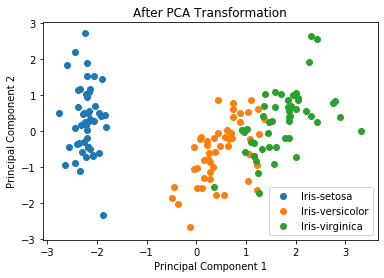

[0.72770452 0.23030523]
0.9580097536148199


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = np.loadtxt('iris.csv', delimiter=',', 
	dtype='str', skiprows=1)
print(data)

# get all rows; exclude first and last column
x = data[:,1:-1]
print(x)

# get labels
y = data[:,-1]
print(y)

# use StandardScaler to zero-mean and unit-variant 
# on each extracted column (note that each column 
# represents multiple observations of a single feature 
# in our dataset)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# pass standardized data to PCA
# out of the 4 existing features,
# we want to create 2 NEW features
pca = PCA(n_components=2)

# returns a NumPy array of size 'n_components'
pc = pca.fit_transform(x_scaled)

for species in np.unique(y):
	pc_by_species = pc[y==species]
	plt.scatter(x=pc_by_species[:, 0], 
		y=pc_by_species[:, 1],
        label=species)

plt.legend()
plt.title('After PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# PCA WORKSHOP

    Cultivar  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0          1    14.23        1.71  2.43               15.6        127   
1          1    13.20        1.78  2.14               11.2        100   
2          1    13.16        2.36  2.67               18.6        101   
3          1    14.37        1.95  2.50               16.8        113   
4          1    13.24        2.59  2.87               21.0        118   
5          1    14.20        1.76  2.45               15.2        112   
6          1    14.39        1.87  2.45               14.6         96   
7          1    14.06        2.15  2.61               17.6        121   
8          1    14.83        1.64  2.17               14.0         97   
9          1    13.86        1.35  2.27               16.0         98   
10         1    14.10        2.16  2.30               18.0        105   
11         1    14.12        1.48  2.32               16.8         95   
12         1    13.75        1.73  2.41            

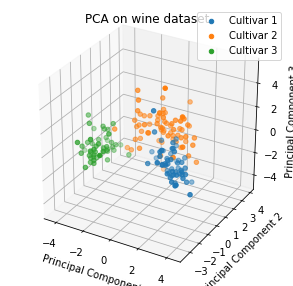

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d


dataset = pd.read_csv('wine.csv')
df = pd.DataFrame(dataset)
pd.set_option('display.max_columns', None)
print(df.head(n=30))

y = dataset.loc[:,'Cultivar'].values
x = StandardScaler().fit_transform(dataset.iloc[:,1:])

# apply PCA on our features
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
print(pc)

print('Explained Variance ratio: ', pca.explained_variance_ratio_)
print('Explained Variance for ' + str(pca.n_components) + 
	' principal components: ', pca.explained_variance_ratio_.sum())

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
                                                                                                                                                                   
for i in np.unique(y):
	pc_by_cultivar = pc[y==i]
	ax.scatter3D(xs=pc_by_cultivar[:, 0], 
		ys=pc_by_cultivar[:, 1],
		zs=pc_by_cultivar[:, 2], 
		label='Cultivar ' + str(i))

plt.title('PCA on wine dataset')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.legend()
plt.show()


In [4]:
print(pc)

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605]
 ...
 [-2.67783946 -2.76089913 -0.94094188  0.31203475  1.271355    0.27306792]
 [-2.38701709 -2.29734668 -0.5506962  -0.68828455  0.81395522  1.17878298]
 [-3.20875816 -2.76891957  1.01391366  0.59690319 -0.89519259  0.29609218]]
